In [101]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import calendar

In [2]:
df = pd.read_csv('2013_movies.txt')
df.head(10)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
5,Gravity,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00
8,Fast & Furious 6,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00
9,Oz The Great and Powerful,215000000.0,234911825,Sam Raimi,PG,127,2013-03-08 00:00:00


Q1. Plot domestic total gross over time.

In [4]:
df_date = df.sort('ReleaseDate')
df_date.head(10)

/Users/allison18paige/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04 00:00:00
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11 00:00:00
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11 00:00:00
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18 00:00:00
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25 00:00:00
52,Warm Bodies,35000000.0,66380662,Jonathan Levine,PG-13,97,2013-02-01 00:00:00
87,Side Effects,NaN,32172757,Steven Soderbergh,R,106,2013-02-08 00:00:00
19,Identity Thief,35000000.0,134506920,Seth Gordon,R,111,2013-02-08 00:00:00
47,Safe Haven,28000000.0,71349120,Lasse Hallstrom,PG-13,115,2013-02-14 00:00:00
51,A Good Day to Die Hard,92000000.0,67349198,John Moore,R,97,2013-02-14 00:00:00


In [9]:
df_date.plot(x='ReleaseDate', y='DomesticTotalGross')
plt.show()

Q2. Plot runtime vs. domestic total gross.

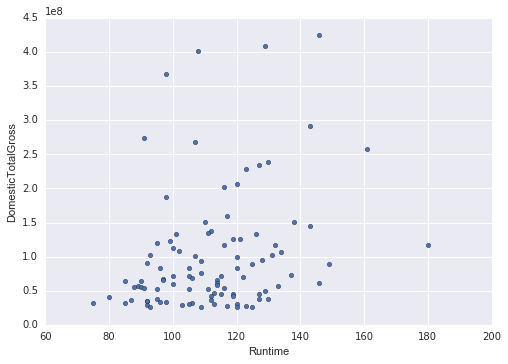

In [98]:
df.plot.scatter(x='Runtime', y='DomesticTotalGross')
rt_dtg_plot = 
plt.show()

[<matplotlib.text.Text at 0x1236d2c10>, <matplotlib.text.Text at 0x123aed410>]

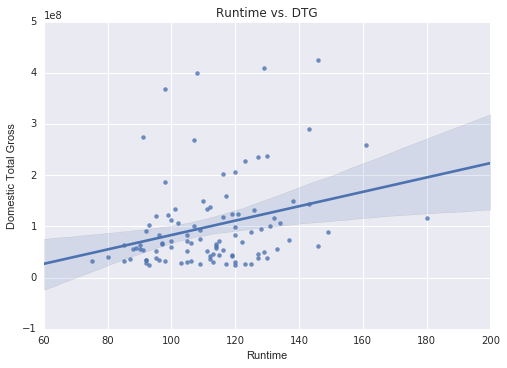

In [99]:
rt_dtg_plot = sns.regplot(x = 'Runtime', y='DomesticTotalGross', data = df)
rt_dtg_plot.set(ylabel = 'Domestic Total Gross', title = 'Runtime vs. DTG')

Q3. Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [49]:
df_date.head(1)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04 00:00:00


In [50]:
df_date['ReleaseDate'] = pd.to_datetime(df_date.ReleaseDate)

In [54]:
df_rating = df_date[['ReleaseDate','DomesticTotalGross','Rating']].groupby('Rating').mean()
df_rating

,DomesticTotalGross
Rating,
G,268492764
PG,131135716
PG-13,111449769
R,69892429


Q4. Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

Rating
G        Axes(0.125,0.2;0.775x0.7)
PG       Axes(0.125,0.2;0.775x0.7)
PG-13    Axes(0.125,0.2;0.775x0.7)
R        Axes(0.125,0.2;0.775x0.7)
dtype: object

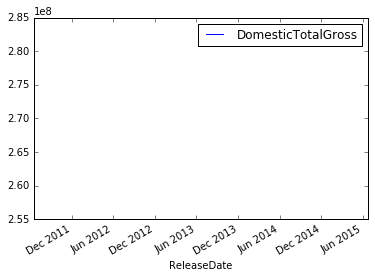

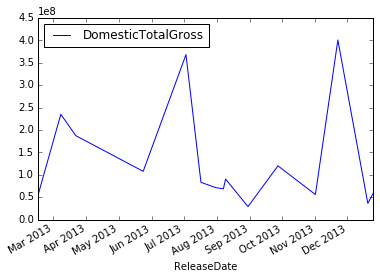

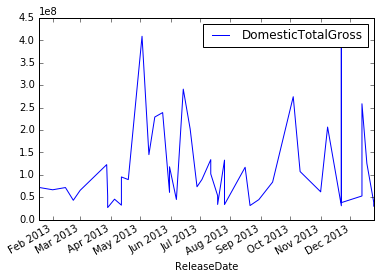

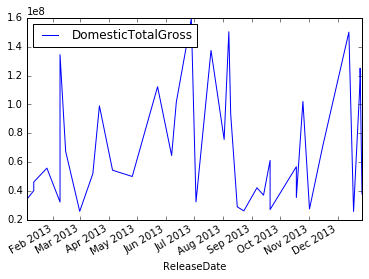

In [68]:
df_date.groupby('Rating').plot('ReleaseDate','DomesticTotalGross', layout=(2, 2))

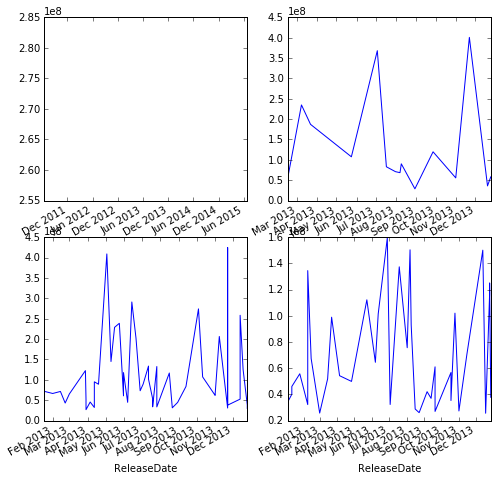

In [74]:
f, axList = plt.subplots(nrows=2, ncols=2)
f.set_size_inches(8,8)

for ax, (rating, dat) in zip(axList.flatten(), df_date.groupby('Rating')):
    dat.plot('ReleaseDate','DomesticTotalGross', ax=ax, legend=False)
    
    
#df_rating.groupby(level=0).hist('DomesticTotalGross',subplots=True)
#plot(x='ReleaseDate', y='DomesticTotalGross', subplots=True)


Q5. What director in your dataset has the highest gross per movie?

In [23]:
df_director = df.groupby('Director').mean()
df_director.sort('DomesticTotalGross', ascending=False)

/Users/allison18paige/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Budget,DomesticTotalGross,Runtime
Director,,,
Francis Lawrence,130000000.0,424668047.0,146.0
Shane Black,200000000.0,409013994.0,129.0
Chris BuckJennifer Lee,150000000.0,400738009.0,108.0
Pierre CoffinChris Renaud,76000000.0,368061265.0,98.0
Zack Snyder,225000000.0,291045518.0,143.0
Alfonso Cuaron,100000000.0,274092705.0,91.0
Dan Scanlon,NaN,268492764.0,107.0
Peter Jackson,NaN,258366855.0,161.0
Justin Lin,160000000.0,238679850.0,130.0


Q5. Answer: Francis Lawerence

Q6. Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

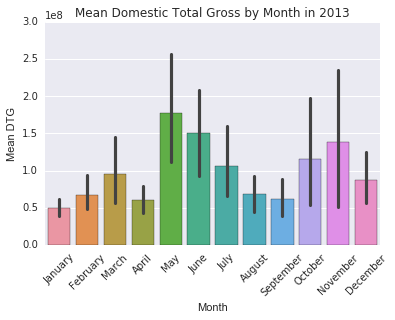

In [106]:
barplot = sns.barplot(x = 'Month', y='DomesticTotalGross', data = df_date)
barplot.set(ylabel = 'Mean DTG', title = 'Mean Domestic Total Gross by Month in 2013')
month_list = [calendar.month_name[i] for i in range(1, 13)]
barplot.set(xticklabels = month_list)
for item in barplot.get_xticklabels():
    item.set_rotation(45)